In [139]:
import ROOT
import math
from math import exp as exp
from math import sqrt as sqrt
from ROOT import gRandom, TF1, TH1F, TStopwatch
import numpy as np

In [149]:
def f(xx, pp):
    x, y = xx[0], xx[1]
    p = pp[0]
    return exp(x**2 + y) / (1 + x * sqrt(y) * 0.5)

xa = 0
xb = 0.5
ya = 1
yb = 3

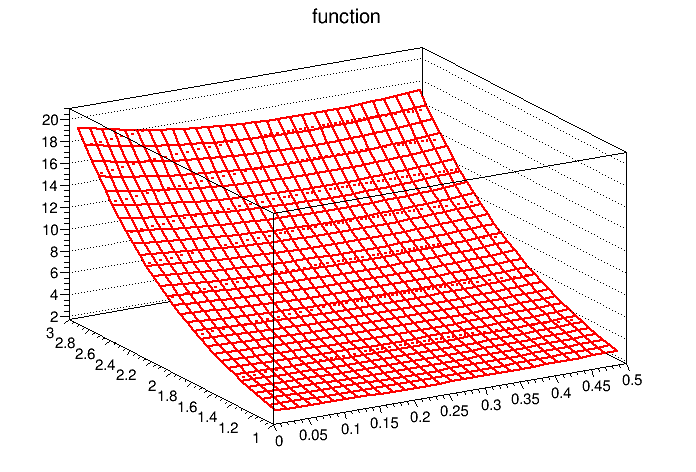

In [150]:
canvas = ROOT.TCanvas()
function = ROOT.TF2("function", f, xa, xb, ya, yb, 1)
function.SetParameter(0,1)
function.Draw("surf")
canvas.Draw()

In [151]:
def integrate(function, a, b, N):
    ax, ay = a[0], a[1]
    bx, by = b[0], b[1]
    si = 0 
    si1 = 0
    for j in range (0, number):
        xj = ROOT.gRandom.Uniform(ax, bx)
        yj = ROOT.gRandom.Uniform(ay, by)
        fj = function(xj, yj)
        si += fj*(bx-ax)*(by-ay)
        si1 += (fj*(bx-ax)*(by-ay))**2
    return si, si1

In [152]:
tmp_s, tmp_s1 = 0, 0

number = 1000

for i in range (1, 11):
    si, s2i = integrate(function, [xa, ya], [xb, yb], number)

    tmp_s += si
    tmp_s1 += s2i
    Ei = si/number #Ei on the i-th step
    E = tmp_s/(i*number) #summary E
    Di = s2i/number - (Ei)**2
    D = tmp_s1/(i*number) - (E)**2
    sigmai = sqrt(Di/number)
    sigma = sqrt(D/(i*number))

    print(i, ": ", "\tE:", round(M,6), "\ts:", round(sigma, 6), "\tEi:", round(Mi, 6), "\tsi:", round(sigmai, 6))

1 :  	E: 7.967125 	s: 0.136679 	Ei: 7.769398 	si: 0.136679
2 :  	E: 7.967125 	s: 0.095756 	Ei: 7.769398 	si: 0.134069
3 :  	E: 7.967125 	s: 0.07929 	Ei: 7.769398 	si: 0.140388
4 :  	E: 7.967125 	s: 0.068446 	Ei: 7.769398 	si: 0.135455
5 :  	E: 7.967125 	s: 0.061206 	Ei: 7.769398 	si: 0.136735
6 :  	E: 7.967125 	s: 0.055617 	Ei: 7.769398 	si: 0.133029
7 :  	E: 7.967125 	s: 0.051623 	Ei: 7.769398 	si: 0.138648
8 :  	E: 7.967125 	s: 0.048378 	Ei: 7.769398 	si: 0.13849
9 :  	E: 7.967125 	s: 0.045607 	Ei: 7.769398 	si: 0.136641
10 :  	E: 7.967125 	s: 0.043235 	Ei: 7.769398 	si: 0.135819


In [148]:
def F(xx, pp):
    return exp(xx[0] ** 2) / (1 + xx[0] * sqrt(xx[1]) * 0.5)

def g(xx, pp):
    return exp(xx[0]**2 + xx[1]) 

def g_x(xx, pp):
    p = pp[0]
    return exp(xx[0]**2)

ga = g_x([xa], [1])
gb = g_x([xb], [1])

def gx_inv(xx, pp):
    x = xx[0]
    p = pp[0]
    return np.sign(x) * sqrt(math.log(x))

def g_y(yy, pp):
    p = pp[0]
    return exp(yy[0])

def gy_norm(y):
    return (g_y([y], [1]) - g_y([ya], [1])) / (g_y([yb], [1]) - g_y([ya], [1]))


g_x_a = g_x([xa], [1])
g_x_b = g_x([xb], [1])
g_y_a = g_y([ya], [1])
g_y_b = g_y([yb], [1])

def gy_inv(yy, pp):
    y = yy[0]
    p = pp[0]
    return math.log(y * (g_y_b - g_y_a) + g_y_a)

def norm():
    return (g_y_b - g_y_a) * (xb - xa)

In [112]:
print(gx_inv([g_x_a],[1]), gx_inv([g_x_b],[1]))
print(gy_inv([0.], [1]), gy_inv([1.], [1]))
print(xa, xb, ya, yb)
print(g_y_a, g_y_b)
print(gy_norm(ya), gy_norm(yb))
gnorm_ya = gy_norm(ya)
gnorm_yb = gy_norm(yb)

0.0 0.4999999999999999
1.0 3.0
0 0.5 1 3
2.718281828459045 20.085536923187668
0.0 1.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


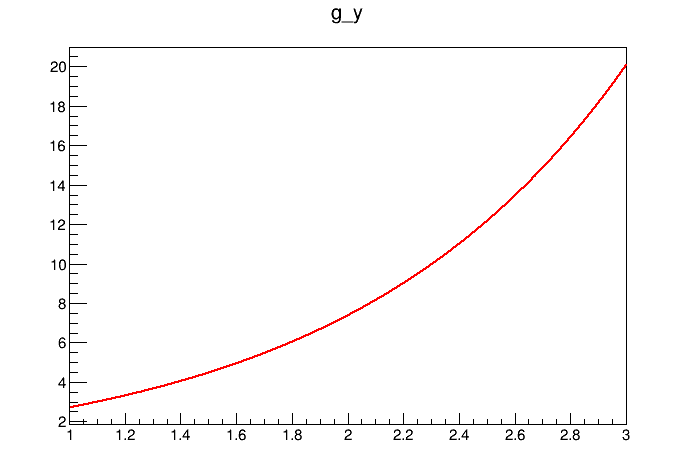

In [42]:
c = ROOT.TCanvas("c", "result")
f1 = ROOT.TF1("g_y", g_y, ya, yb, 1)
f1.SetParameters(1, 1)
f1.SetNpx(10000)
f1.Draw()
c.Draw()

In [55]:
def get_random_xy(xa, xb, g_ya, g_yb):
#     ksi_x = gRandom.Uniform(g_xb, g_xa)
    ksi_y = gRandom.Uniform(g_yb, g_ya)
    x = gRandom.Uniform(xb, xa) #gx_inv([ksi_x], [1])
    y = gy_inv([ksi_y], [1])
    return x, y

Real time 0:00:00, CP time 0.020
 FCN=49.8013 FROM HESSE     STATUS=FAILED         11 CALLS          51 TOTAL
                     EDM=0    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -8.92253e+04   1.41421e+00   0.00000e+00   0.00000e+00


Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).


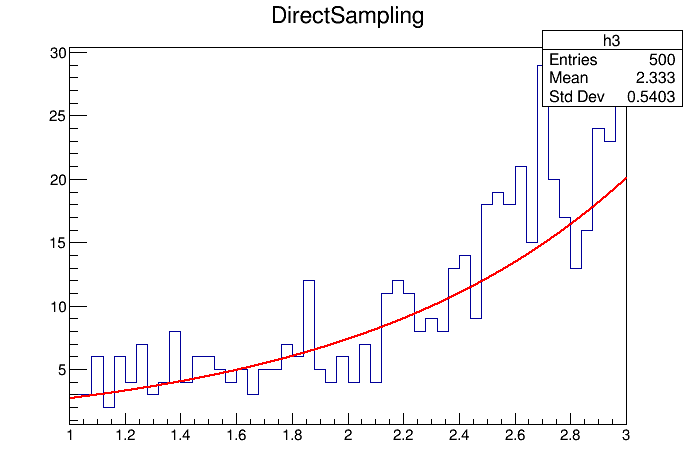

In [59]:
h3 = TH1F("h3","DirectSampling",50,1,3)
sw = TStopwatch()
sw.Start()
for i in range(0, 500):
    xr, yr = get_random_xy(xa, xb, gnorm_ya, gnorm_yb)
#     ksi = gRandom.Uniform(g_x_b, g_x_a)
#     r = gx_inv([ksi], [1])
    h3.Fill(yr)
sw.Stop()
sw.Print()
h3.Fit(f1)
h3.Draw()
c.Draw()

In [34]:
def ff(xx, pp):
    x = xx[0]
    y = xx[1]
    return exp(x**2) / (1 + x * sqrt(y) * 0.5)

def fexp(xx, pp):
    x = xx[0]
    y = xx[1]
    return exp(x**2 + y)

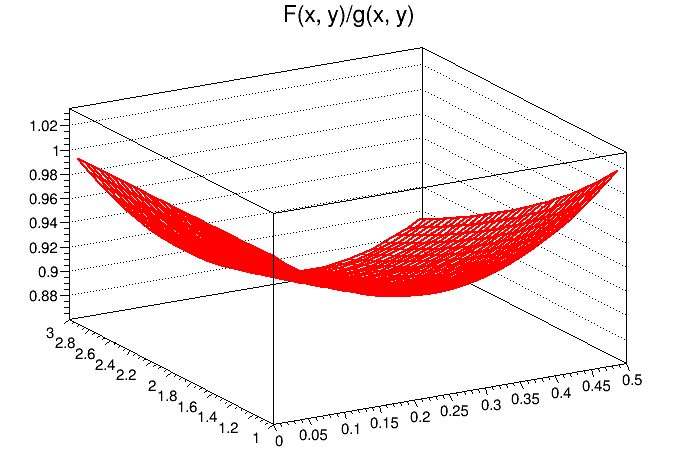

In [35]:
canvas = ROOT.TCanvas()
function = ROOT.TF2("F(x, y)/g(x, y)", ff, xa, xb, ya, yb, 1)
function.SetParameter(0,1)
function.Draw("surf")
canvas.Draw()

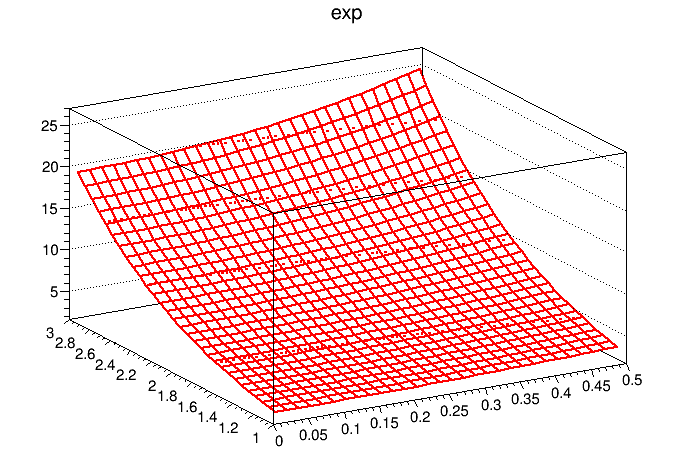

In [88]:
canvas = ROOT.TCanvas()
function = ROOT.TF2("exp", fexp, xa, xb, ya, yb, 1)
function.SetParameter(0,1)
function.Draw("surf")
canvas.Draw()

In [153]:
def substantial_sampling_method(F_func, fg_norm, N):    
    s, s2 = 0, 0
    for j in range (0, N):
        x, y = get_random_xy(xa, xb, g_y_a, g_y_b)
        res = F_func([x, y], [1]) * fg_norm()
        s += res
        s2 += res ** 2
    result = s / N
    return result, s, s2

In [154]:
def test_sampl_method(N):
    s_arr = []
    number = N
    results_i = []
    result = 0
    tmp_s, tmp_s1 = 0, 0
    for i in range (1, 11):
        res_i, si, s2i = substantial_sampling_method(ff, norm, number)

        tmp_s += si
        tmp_s1 += s2i
        Ei = si/number #Ei on the i-th step
        E = tmp_s/(i*number) #summary E
        Di = s2i/number - (Ei)**2
        D = tmp_s1/(i*number) - (E)**2
        sigmai = sqrt(Di/number)
        sigma = sqrt(D/(i*number))

        print(i, ": ", "\tE:", round(M,6), "\ts:", round(sigma, 6), "\tEi:", round(Mi, 6), "\tsi:", round(sigmai, 6))

In [155]:
test_sampl_method(1000)

1 :  	E: 7.967125 	s: 0.015287 	Ei: 7.769398 	si: 0.015287
2 :  	E: 7.967125 	s: 0.010741 	Ei: 7.769398 	si: 0.015093
3 :  	E: 7.967125 	s: 0.008874 	Ei: 7.769398 	si: 0.015719
4 :  	E: 7.967125 	s: 0.007654 	Ei: 7.769398 	si: 0.015117
5 :  	E: 7.967125 	s: 0.006821 	Ei: 7.769398 	si: 0.015029
6 :  	E: 7.967125 	s: 0.006224 	Ei: 7.769398 	si: 0.01521
7 :  	E: 7.967125 	s: 0.005739 	Ei: 7.769398 	si: 0.01479
8 :  	E: 7.967125 	s: 0.005382 	Ei: 7.769398 	si: 0.015485
9 :  	E: 7.967125 	s: 0.005086 	Ei: 7.769398 	si: 0.015549
10 :  	E: 7.967125 	s: 0.004831 	Ei: 7.769398 	si: 0.015398
